# Task no 1 

In [24]:
import pandas as pd

distance_from_sun = [149.6, 1433.5, 227.9, 108.2, 778.6]

planets = ['Earth','Saturn', 'Mars','Venus', 'Jupiter']

# Create a Pandas Series using the above data, with the name of the planets as
dist_planets=pd.Series(distance_from_sun, index=planets)

# use a value for the speed of light of c = 18, since light travels 18 x 10^6 km/minute. 
c =18 

time_light=dist_planets/c

# Use Boolean indexing to select only those planets for which sunlight takes less
# than 40 minutes to reach them
close_planets=time_light[time_light<40]

print(close_planets)





Earth     8.311111
Mars     12.661111
Venus     6.011111
dtype: float64


# Task no 2

In [70]:
import pandas as pd 
import numpy as np

books = pd.Series(data = ['Great Expectations', 'Of Mice and Men', 'Romeo and Juliet', 'The Time Machine', 'Alice in Wonderland' ])
authors = pd.Series(data = ['Charles Dickens', 'John Steinbeck', 'William Shakespeare', ' H. G. Wells', 'Lewis Carroll' ])

user_1 = pd.Series(data = [3.2, np.nan ,2.5])
user_2 = pd.Series(data = [5., 1.3, 4.0, 3.8])
user_3 = pd.Series(data = [2.0, 2.3, np.nan, 4])
user_4 = pd.Series(data = [4, 3.5, 4, 5, 4.2])


dat={
    'Authors':authors,
    'Book_title':books,
    'User 1':user_1,
    'User 2':user_2,
    'User 3':user_3,
    'User 4':user_4,
}

book_ratings=pd.DataFrame(dat)


book_ratings.fillna(book_ratings.mean(numeric_only=True), inplace=True)

best_rated= book_ratings[(book_ratings==5).any(axis=1)]['Book_title'].values

print("Books Ratings:")
print(book_ratings)
print("\nBest Best Rated Books:")
print(best_rated)

Books Ratings:
               Authors           Book_title  User 1  User 2    User 3  User 4
0      Charles Dickens   Great Expectations    3.20   5.000  2.000000     4.0
1       John Steinbeck      Of Mice and Men    2.85   1.300  2.300000     3.5
2  William Shakespeare     Romeo and Juliet    2.50   4.000  2.766667     4.0
3          H. G. Wells     The Time Machine    2.85   3.800  4.000000     5.0
4        Lewis Carroll  Alice in Wonderland    2.85   3.525  2.766667     4.2

Best Best Rated Books:
['Great Expectations' 'The Time Machine']


# Task no 3 

In [129]:
import pandas as pd 

df=pd.read_csv("GOOG.csv")

df.head()

# We load the Google stock data into a DataFrame
google_stock = pd.read_csv("GooG.csv", usecols=['Date','Adj Close'], parse_dates=["Date"], index_col=['Date'])

# We load the Apple stock data into a DataFrame
apple_stock = pd.read_csv("AAPL.csv", usecols=['Date','Adj Close'], parse_dates=['Date'], index_col=['Date'])

# We load the Amazon stock data into a DataFrame
amazon_stock = pd.read_csv("AMZN.csv", usecols=['Date','Adj Close'], parse_dates=['Date'], index_col=['Date'])

# We create calendar dates between '2000-01-01' and  '2016-12-31'
dates = pd.date_range('2000-01-01', '2016-12-31')

# We create and empty DataFrame that uses the above dates as indices
all_stocks = pd.DataFrame(index = dates)

# Change the Adj Close column label to Google
google_stock = google_stock.rename(columns={'Adj Close':'Google'})

# Change the Adj Close column label to Apple
apple_stock = apple_stock.rename(columns={'Adj Close':"Apple"})

# Change the Adj Close column label to Amazon
amazon_stock = amazon_stock.rename(columns={'Adj Close':"Amazon"})


# We join the Google stock to all_stocks
all_stocks = all_stocks.join(google_stock)

# We join the Apple stock to all_stocks
all_stocks = all_stocks.join(apple_stock)

# We join the Amazon stock to all_stocks
all_stocks =all_stocks.join(amazon_stock)


# Check if there are any NaN values in the all_stocks dataframe
all_stocks.isna()

# Remove any rows that contain NaN values
all_stocks.dropna()

# Print the average stock price for each stock
print("Average stock price:")
print(all_stocks.mean())

# Print the median stock price for each stock
print("\nMedian stock price:")
print(all_stocks.median())

# Print the standard deviation of the stock price for each stock  
print("\nStandard deviation of the stock:")
print(all_stocks.std())

# Print the correlation between stocks
print("\nCorrelation between stocks:")
print(all_stocks.corr())

# We compute the rolling mean using a 150-Day window for Google stock
rollingMean = google_stock["Google"].rolling(window=150).mean()
print("\nRolling mean of google company")
print(rollingMean)

Average stock price:
Google    347.420229
Apple      35.222976
Amazon    166.095436
dtype: float64

Median stock price:
Google    286.397247
Apple      17.524017
Amazon     76.980003
dtype: float64

Standard deviation of the stock:
Google    187.671596
Apple      37.945557
Amazon    189.212345
dtype: float64

Correlation between stocks:
          Google     Apple    Amazon
Google  1.000000  0.900242  0.952444
Apple   0.900242  1.000000  0.906296
Amazon  0.952444  0.906296  1.000000

Rolling mean of google company
Date
2004-08-19           NaN
2004-08-20           NaN
2004-08-23           NaN
2004-08-24           NaN
2004-08-25           NaN
                 ...    
2017-10-09    914.616868
2017-10-10    915.531735
2017-10-11    916.535535
2017-10-12    917.499402
2017-10-13    918.460335
Name: Google, Length: 3313, dtype: float64


We can also visualize the rolling mean by plotting the data in our dataframe. In the following lessons you will learn how to use Matplotlib to visualize data. For now I will just import matplotlib and plot the Google stock data on top of the rolling mean. You can play around by changing the rolling mean window and see how the plot changes.

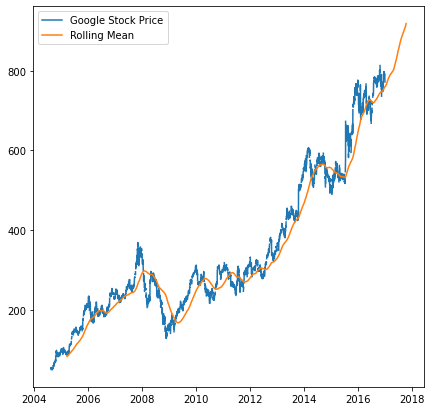

In [142]:
# import matplotlib for visualization 
import matplotlib.pyplot as plt
%matplotlib inline

# this will incrase size of figure 
plt.figure(figsize=(7,7))

# We plot the Google stock data
plt.plot(all_stocks['Google'])

# We plot the rolling mean ontop of our Google stock data
plt.plot(rollingMean)
plt.legend(['Google Stock Price', 'Rolling Mean'])
plt.show()